# Aula 1 - Explorando os dados sobre vendas de carros

## 1.1 Importando bibliotecas necessárias

Antes de começar qualquer coisa devemos importar as bibliotecas que serão utilizadas ao longo da nossa análise. Após importar algum pacote sempre verifique a versão (atributo `__version__`) e caso a disponível não seja a desejada, instale a de sua preferência.

In [98]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [99]:
# print(sns.__version__)
# # !pip install seaborn==0.9.0 # caso seja necessário instalar uma versão diferente da já está inclusa no colab, lembre de importat novamente

## 1.2 Importando os dados

Neste momento os dados serão importados através da URL de cada arquivo em um repositório do [GitHub](https://github.com/brnocesar/learning-data-analysis/tree/main/datasets/alura_time_series) apenas por uma questão de escolha. Se você quiser ter os arquivos de forma local, tanto faz.

In [100]:
carros = pd.read_csv('https://github.com/brnocesar/learning-data-analysis/blob/main/datasets/alura_time_series/alucar.csv?raw=true')

In [101]:
print(f"=> Dimensões do arquivo: {carros.shape}\n")
print(f"=> Tipos do arquivo:\n{carros.dtypes}\n")
carros.head()

=> Dimensões do arquivo: (24, 2)

=> Tipos do arquivo:
mes       object
vendas     int64
dtype: object



,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## 1.3 Identificando dados nulos

Vamos verificar se existem dados nulos no _DataFrame_. Para isso podemos usar duas abordagens: `info()` e `isna()`. A primeira é a mais direta, retornando a quantidade de dados nulos em cada coluna e seu tipo.

In [102]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes



A segunda não retorna uma informação de forma tão imediata. `isna()` vai retornar um _DataFrame_ com as mesmas dimensões do original, mas em cada linha terá um _boolean_ dizendo se a coluna é nula (`True`) ou não (`False`). Então, para sabermos quantos dados nulos existem no df devemos utilizar o método `sum()`, que irá retorna uma _Series_ com o número de valores nulos em cada coluna.

In [103]:
# dados nulos por coluna
carros.isna().sum()

mes       0
vendas    0
dtype: int64

Para obter o número total de valores nulos aplicamos o método `sum()` novamente:

In [104]:
# total de dados nulos no df
carros.isna().sum().sum()

0

## 1.4 Convertendo dados de data

Note que acima quando verificamos os tipos de dados em cada coluna, foi apresentado que o tipo de dado da coluna `mes` é `object`, que nesse contexto de _DataFrames_ do Pandas significam _strings_. Como pretendemos utilizar esses dados para fazer uma análise ao longo do tempo, devemos fazer com que a coluna de tempo esteja em um formato adequado, que no caso é o `datetime`:

In [105]:
carros['mes'] = pd.to_datetime(carros.mes)
carros.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

## 1.5 Plotando o comportamento das vendas ao longo do tempo

Se quisermos apenas ter uma noção de como as vendas estão evoluindo ao longo do tempo, basta rodar o comando `sns.lineplot(data=carros, x='mes', y='vendas')`, mas isso irá retornar um gráfico muitissímo simples.

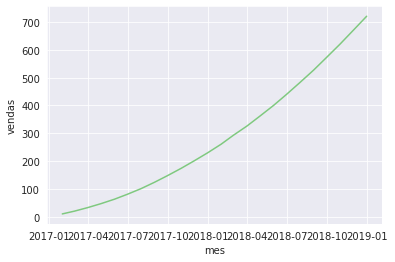

In [106]:
sns.lineplot(data=carros, x='mes', y='vendas')

Para estilizar um pouco o nosso gráfico podemos utilizar [_Urban Institute Data Visualization Style Guide_](https://urbaninstitute.github.io/graphics-styleguide/), que é um guia de estilo que nos auxilia a montar um gráfico harmonioso sugerindo paletas de cores, tamanhos das fontes e posições para os _labels_.

In [107]:
def plota_grafico_linha(dataset, titulo, legenda_x, legenda_y, x='mes', y='vendas', tamanho=(12, 6)):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(data=dataset, x=x, y=y)
    ax.figure.set_size_inches(tamanho)
    ax.set_title(titulo, loc= 'left', fontsize=18)
    ax.set_xlabel(legenda_x, fontsize=14)
    ax.set_ylabel(legenda_y, fontsize=14)
    ax = ax

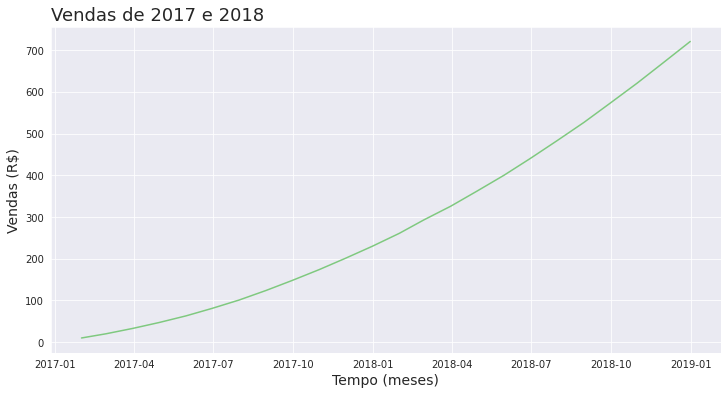

In [108]:
plota_grafico_linha(dataset=carros, titulo='Vendas de 2017 e 2018', legenda_x='Tempo (meses)', legenda_y='Vendas (R$)')

## 1.6 Lidando com valores nulos

Vamos abrir um parênteses aqui para falar sobre algumas formas de lidar com valores nulos. Para isso vamos montar um _DataFrame_ no mesmo formato dos que são tratados nesse _notebook_, mas com valores nulos.

In [109]:
def gera_df_com_valor_nulo(seed=123, valor_minimo=20, valor_maximo=25, tamanho=24):
    np.random.seed(seed)
    df = pd.DataFrame({
        'mes': pd.date_range('1/1/2017', periods=tamanho, freq='M'), 
        'vendas': np.random.randint(low=valor_minimo, high=valor_maximo, size=tamanho)
    })

    for i in range(valor_minimo, valor_maximo):
        df.loc[df.vendas == i, ['vendas']] = np.nan
        if df.vendas.isna().sum():
            print(f"Valor removido:\t{i}\nValores nulos:\t{df.vendas.isna().sum()}\n")
            return df

df = gera_df_com_valor_nulo()
df.head()

Valor removido:	20
Valores nulos:	5



,mes,vendas
0,2017-01-31,22.0
1,2017-02-28,24.0
2,2017-03-31,22.0
3,2017-04-30,21.0
4,2017-05-31,23.0


### 1.6.1 Removendo linhas com valores nulos

In [110]:
df = gera_df_com_valor_nulo()

print(f"Total linhas: {df.shape[0]}\tValores nulos antes: {df.isna().sum().sum()}")
df.dropna(inplace=True)
print(f"Total linhas: {df.shape[0]}\tValores nulos depois: {df.isna().sum().sum()}")

Valor removido:	20
Valores nulos:	5

Total linhas: 24	Valores nulos antes: 5
Total linhas: 19	Valores nulos depois: 0


### 1.6.2 Preenchendo dados nulos com a média da coluna ou outro valor específico

In [111]:
df = gera_df_com_valor_nulo()

print(f"Soma da coluna 'vendas': {int(df.vendas.sum())}\tValores nulos antes: {df.isna().sum().sum()}")

media_coluna = df.vendas.mean()
print(f"Média da coluna 'vendas': {int(media_coluna)}\tTotal adicionado: {int(media_coluna * df.isna().sum().sum())}")

df.fillna(media_coluna, inplace=True)
df.vendas = df.vendas.round()
print(f"Soma da coluna 'vendas': {int(df.vendas.sum())}\tValores nulos depois: {df.isna().sum().sum()}")

Valor removido:	20
Valores nulos:	5

Soma da coluna 'vendas': 423	Valores nulos antes: 5
Média da coluna 'vendas': 22	Total adicionado: 111
Soma da coluna 'vendas': 533	Valores nulos depois: 0


### 1.6.3 Preenchendo dados nulos com o valor anterior ou posterior


In [112]:
df = gera_df_com_valor_nulo(valor_minimo=1, valor_maximo=100)

df['vendas_2'] = df.vendas
df['era_nulo'] = df.vendas.isna()
df.vendas.ffill(inplace=True) # pega o valor anterior
df.vendas_2.bfill(inplace=True) # pega o posterior
df

Valor removido:	18
Valores nulos:	1



,mes,vendas,vendas_2,era_nulo
0,2017-01-31,67.0,67.0,False
1,2017-02-28,93.0,93.0,False
2,2017-03-31,99.0,99.0,False
3,2017-04-30,99.0,84.0,True
4,2017-05-31,84.0,84.0,False
5,2017-06-30,58.0,58.0,False
6,2017-07-31,87.0,87.0,False
7,2017-08-31,98.0,98.0,False
8,2017-09-30,97.0,97.0,False
9,2017-10-31,48.0,48.0,False


In [113]:
df = gera_df_com_valor_nulo(valor_minimo=1, valor_maximo=100)

df.loc[[0,2], ['vendas']] = np.nan # precisa existir algum valor não nulo na "cadeia" dos copiados
df.ffill().head()

Valor removido:	18
Valores nulos:	1



,mes,vendas
0,2017-01-31,NaN
1,2017-02-28,93.0
2,2017-03-31,93.0
3,2017-04-30,93.0
4,2017-05-31,84.0


### 1.6.4 Interpolando dados nulos com um com o valor médio

In [114]:
df = gera_df_com_valor_nulo(seed=456, valor_minimo=1, valor_maximo=100)

df['era_nulo'] = df.vendas.isna()
df.interpolate()

Valor removido:	5
Valores nulos:	1



,mes,vendas,era_nulo
0,2017-01-31,28.0,False
1,2017-02-28,44.0,False
2,2017-03-31,90.0,False
3,2017-04-30,43.0,False
4,2017-05-31,29.0,False
5,2017-06-30,80.0,False
6,2017-07-31,61.0,False
7,2017-08-31,46.0,False
8,2017-09-30,38.0,False
9,2017-10-31,93.0,False


# Aula 2 - Decomposição e autocorrelação

## 2.1 Decompondo as vendas

A decomposição de dados de uma série temporal permite mensurar a evolução desses dados ao longo do tempo.

**Colocar uma definição do que é "fazer a decomposição dos dados da _time series_".**

Vamos começar calculando a variação das vendas de um mês para outro, ou seja, em relação ao mês anterior qual foi a variação no valor de vendas no mês atual. Vamos criar um nova coluna que tenha o valor da venda no mês N menos o valor das vendas no mês N-1, e o Pandas já nos fornece um função pronto para fazer isso:

In [115]:
carros['aumento'] = carros.vendas.diff()
carros.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


Agora podemos plotar um gráfico para acompanhar o aumento ao longo do tempo:

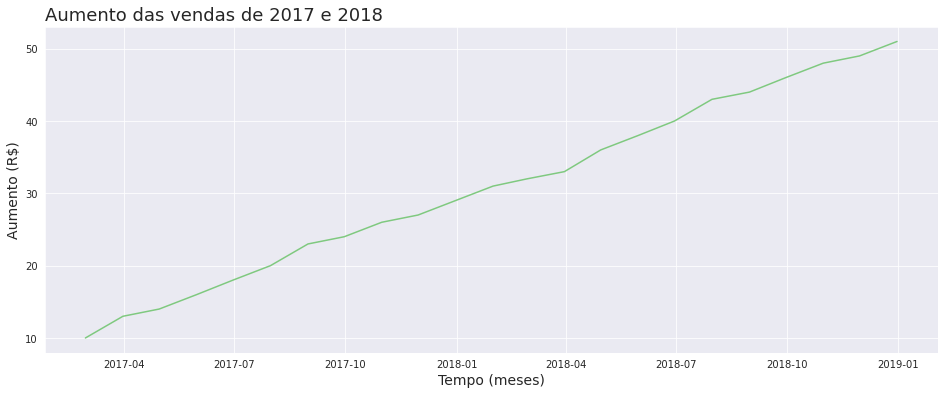

In [116]:
plota_grafico_linha(dataset=carros, y='aumento', titulo='Aumento das vendas de 2017 e 2018', legenda_x='Tempo (meses)', legenda_y='Aumento (R$)', tamanho=(16, 6))

Vamos repetir esse processo para saber como o aumento está a evoluindo, o resultado será colocado na coluna `aceleracao`:

In [117]:
carros['aceleracao'] = carros.aumento.diff()
carros.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


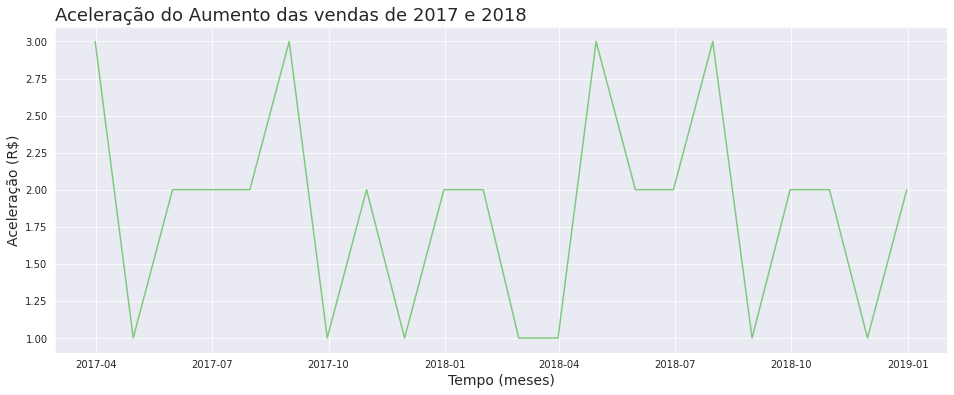

In [118]:
plota_grafico_linha(dataset=carros, y='aceleracao', titulo='Aceleração do Aumento das vendas de 2017 e 2018', legenda_x='Tempo (meses)', legenda_y='Aceleração (R$)', tamanho=(16, 6))

Vamos juntar os três gráficos plotados até agora, as vendas ao longo do tempo e suas decomposições (aumento e acelaração).

In [119]:
def plota_varios_graficos(dataset, titulo, x, y):
    num_graficos = len(y)
    plt.figure(figsize=(18, 4*num_graficos))
    
    ax = plt.subplot(num_graficos, 1, 1)
    sns.lineplot(x=x, y=y[0], data=dataset)
    for i in range(2, num_graficos+1):
        plt.subplot(num_graficos, 1, i)
        sns.lineplot(x=x, y=y[i-1], data=dataset)
    
    ax.set_title(titulo, fontsize=18, loc='left')
    ax=ax

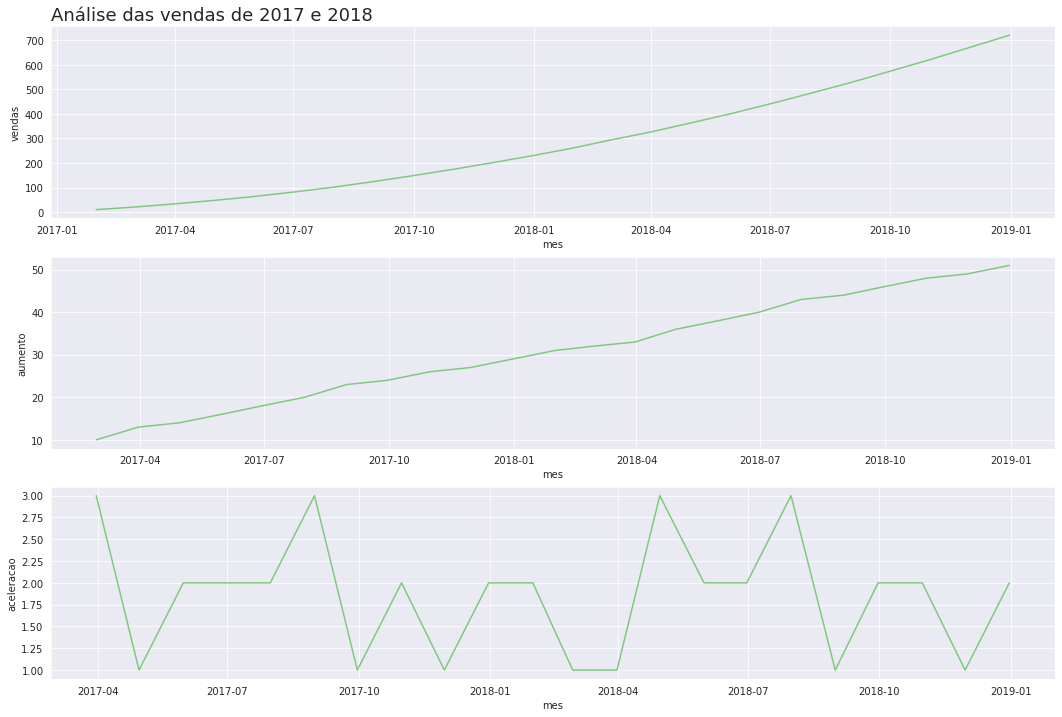

In [120]:
plota_varios_graficos(carros, 'Análise das vendas de 2017 e 2018', 'mes', ['vendas', 'aumento', 'aceleracao'])

Podemos verificar que a tendência das venas é de **aumento**. As vendas estão aumentando a cada mês, assim como o "aumento das vendas". E apesar da aceleração do aumento não aumentar a cada mês, vemos que ela está sempre assumindo valores positivos, entre 1 e 3.

## 2.2 Autocorrelação

Agora queremos avaliar a correlação dos dados de vendas quando ordenados no tempo, ou seja, se os dados de um período estão relacionados aos anteriores. Para isso vamos usar uma função de autocorrelação, que é a medida de correlação entre as observações de uma série temporal. Está é a principal ferramenta de diagnóstico para análise de séries temporais.

Para determinar a correlação devemos comparar os dados com eles mesmos, a essa comparação damos o nome de **_lag_**. A cada ordem do _lag_ devemos "transladar" o período dos dados comparados. Então, em _lag 0_ estamos comparando com os dados com eles mesmos, em _lag 1_ a comparação é feita com os dados de um mês atrás, para _lag 2_ é com dois meses para trás e assim por diante.

Após realizar essas comparações seremos capazes de determinar o "nível de correlação" que vai de +1 (máxima correlação positiva) a -1 (máxima correlação negativa):

- `+1`: correlação perfeita positiva
- `0,7 a 0,9`: correlação forte
- `0,4 a 0,7`: correlação moderada
- `0,2 a 0,4`: correlação fraca
- `0`: correlação nula
- `< 0`: correlação negativa
- `-1`: correlação perfeita negativa

Vamos determinar o nível de autocorrelação através do _plot_ do gráfico de autocorrelação, em que cada ordem de _lag_ será um passo do eixo horizontal. O gráfico será plotado utilizando uma função do Pandas:


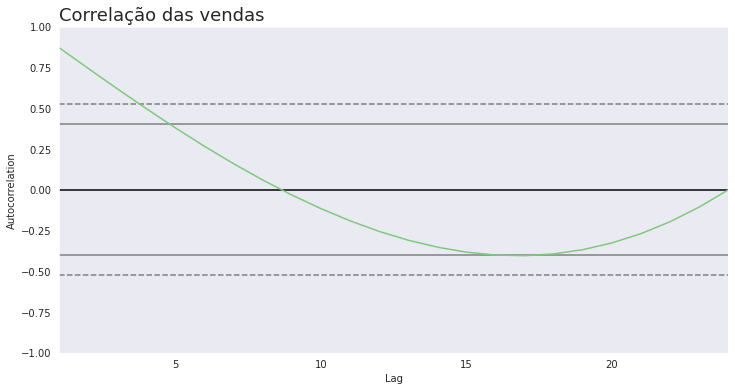

In [121]:
def plota_correlacao(ds, titulo):
    plt.figure(figsize=(12, 6))
    ax = autocorrelation_plot(ds)
    ax.set_title(titulo, fontsize=18, loc='left')
    ax = ax

plota_correlacao(carros.vendas, 'Correlação das vendas')

Analisando o gráfico vemos que para _lag 0_ obtemos a maior correlação possível ficando entre `0.75` e `1.0` que vai diminuindo e passa por zero em _lag 8_, atinge a menor correlação em _lag 17_ e por fim voltar a zero correlação com _lag 24/5_.

Podemos também avaliar a correlação do "aumento de vendas" e da "acelaração do aumento de vendas". Apenas devemos nos atentar que os primeiros valores dessas grandezas são `NaN`, portante devemos indicar a partir de que índice os gráficos serão plotados:

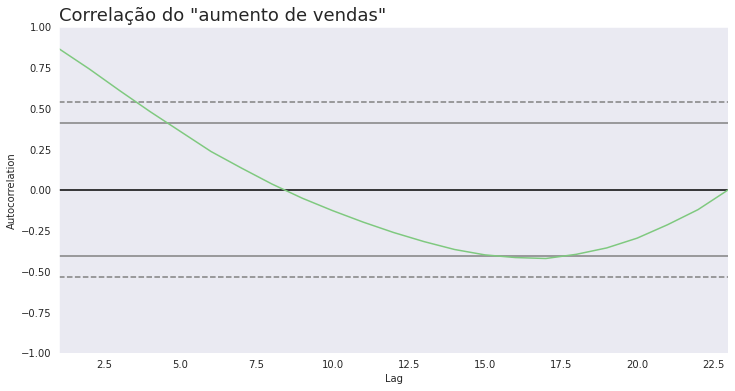

In [122]:
plota_correlacao(carros.aumento[1:], 'Correlação do "aumento de vendas"')

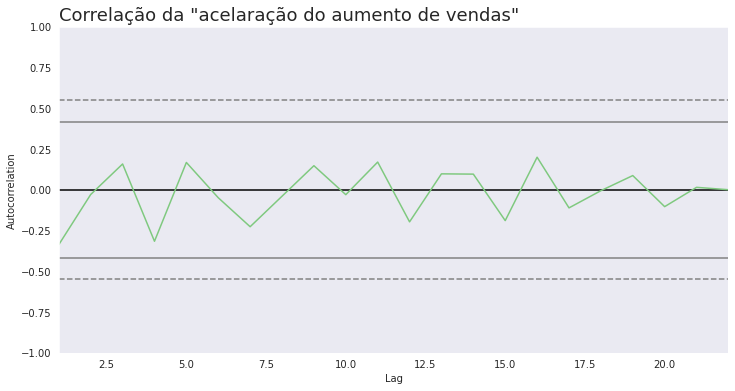

In [123]:
plota_correlacao(carros.aceleracao[2:], 'Correlação da "acelaração do aumento de vendas"')

O gráfico de correlação para o "aumento de vendas" ficou muito parecido com o da correlação de vendas, o que nos permite concluir que existe uma correlação forte entre os cinco últimos períodos da série.

Sobre o último gráfico, não tenho nada a declarar.

=> df
   preco
0   1016
1   1042
2   1048
3    967
4   1033

=> df
   preco  crescimento  evolucao  crescimento_direto
0   1016     0.025591       NaN                 NaN
1   1042     0.005758  0.025591            0.025591
2   1048    -0.077290  0.005758            0.005758
3    967     0.068252 -0.077290           -0.077290
4   1033    -0.025169  0.068252            0.068252


DataFrame de vendas
=> df
         mes  vendas  aumento  aceleracao  crescimento_direto
0 2017-01-31      10      NaN         NaN                 NaN
1 2017-02-28      20     10.0         NaN            1.000000
2 2017-03-31      33     13.0         3.0            0.650000
3 2017-04-30      47     14.0         1.0            0.424242
4 2017-05-31      63     16.0         2.0            0.340426



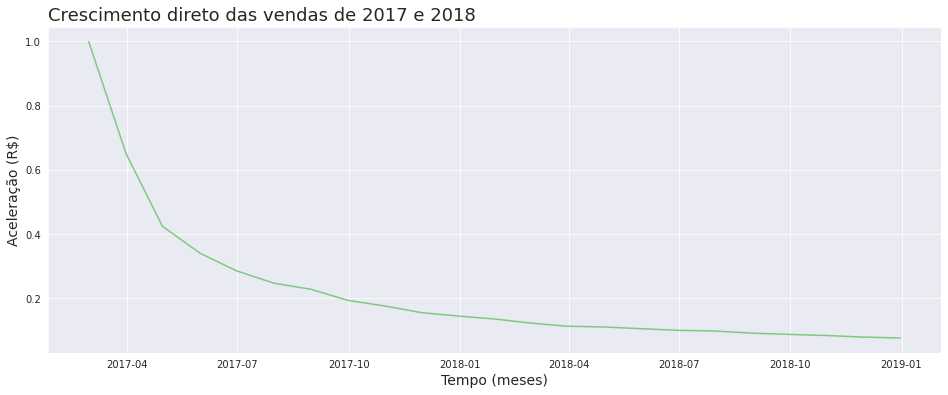

In [124]:
# https://www.alura.com.br/artigos/crescimento-proporcional-entre-linhas-time-series-utilizando-pandas
# evolução de de um valor em função do tempo: (valor_atual - valor_anterior) / valor_anterior = valor_atual / valor_anterior - 1
np.random.seed(123)
aleatorios = np.random.randint(low=950, high=1050, size=100)
df = pd.DataFrame(aleatorios, columns=['preco'])
print(f"=> df\n{df.head()}\n")

# linhas na posicao posterior (n+1): df.preco.shift(-1)
# linhas na posicao atual (n): df.preco
df['crescimento'] = df.preco.shift(-1).div(df.preco) - 1 # artigo
df['evolucao'] = df.preco.div(df.preco.shift(+1)) - 1
df['crescimento_direto'] = df.preco.pct_change() # artigo
print(f"=> df\n{df.head()}")

print("\n\nDataFrame de vendas")

carros['crescimento_direto'] = carros.vendas.pct_change()
print(f"=> df\n{carros.head()}\n")
plota_grafico_linha(dataset=carros, y='crescimento_direto', titulo='Crescimento direto das vendas de 2017 e 2018', legenda_x='Tempo (meses)', legenda_y='Aceleração (R$)', tamanho=(16, 6))
carros = carros.drop(['crescimento_direto'], axis=1)

# Aula 3 - Importância da decomposição e sazonalidade

## 3.1 Assinantes de uma _newsletter_

Vamos analisar dois anos de dados sobre os assinantes de uma _newsletter_. O arquivo com os dados apresenta o número de novos assinantes a cada mês:

In [125]:
assinantes = pd.read_csv('https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/datasets/alura_time_series/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [126]:
assinantes.shape

(24, 2)

In [127]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [128]:
assinantes['mes'] = pd.to_datetime(assinantes.mes)
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

Já vamos calcular as grandezas `aumento` e `aceleração do aumento` e também plotar os gráficos para comparação das quantidades de interesse:

In [129]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


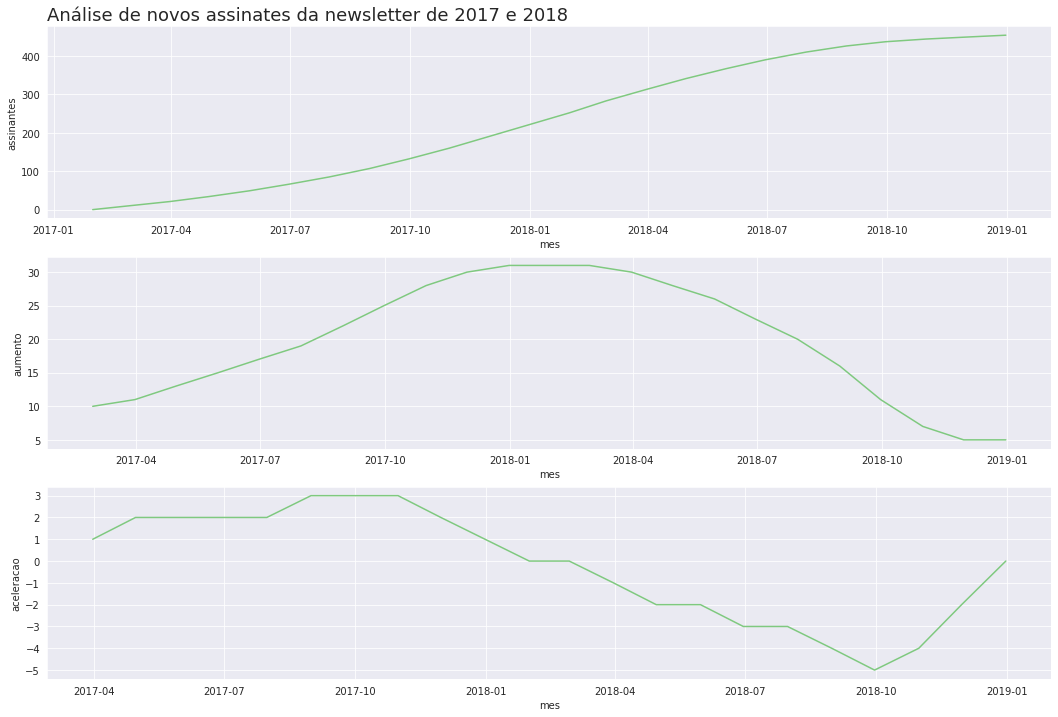

In [130]:
plota_varios_graficos(assinantes, 'Análise de novos assinates da newsletter de 2017 e 2018', 'mes', ['assinantes', 'aumento', 'aceleracao'])

No primeiro gráfico, que mostra a quantidade de novos assinates da newsletter a cada mês, podemos ver claramente que existe um tendência de crescimento no número de novos assinantes. 

No segundo gráfico, do aumento (variação) de novos assinantes, observamos um período em que temos o valor máximo para o aumento e no final temos até uma estagnação.

Já para a "aceleração do aumento de novos assinantes" não temos uma curva comportada. Na verdade temos uma região de máximo e mínimo, chegando a ter valores negativos para a acelaração. O que faz sentido, já que temos um ponto de retorno para o aumento.

## 3.2 Vendas de chocolate e sazonalidade

Vamos analisar as vendas de uma loja de chocolates ao longo de dois anos, repetindo todos os passos feitos para os dados da _newsletter_:

In [131]:
chocolates = pd.read_csv('https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/datasets/alura_time_series/chocolura.csv')
chocolates.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [132]:
print(chocolates.shape)
chocolates.info()

(24, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [133]:
chocolates['mes'] = pd.to_datetime(chocolates.mes)
chocolates.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [134]:
chocolates['aumento'] = chocolates.vendas.diff()
chocolates['aceleracao'] = chocolates.aumento.diff()
chocolates.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


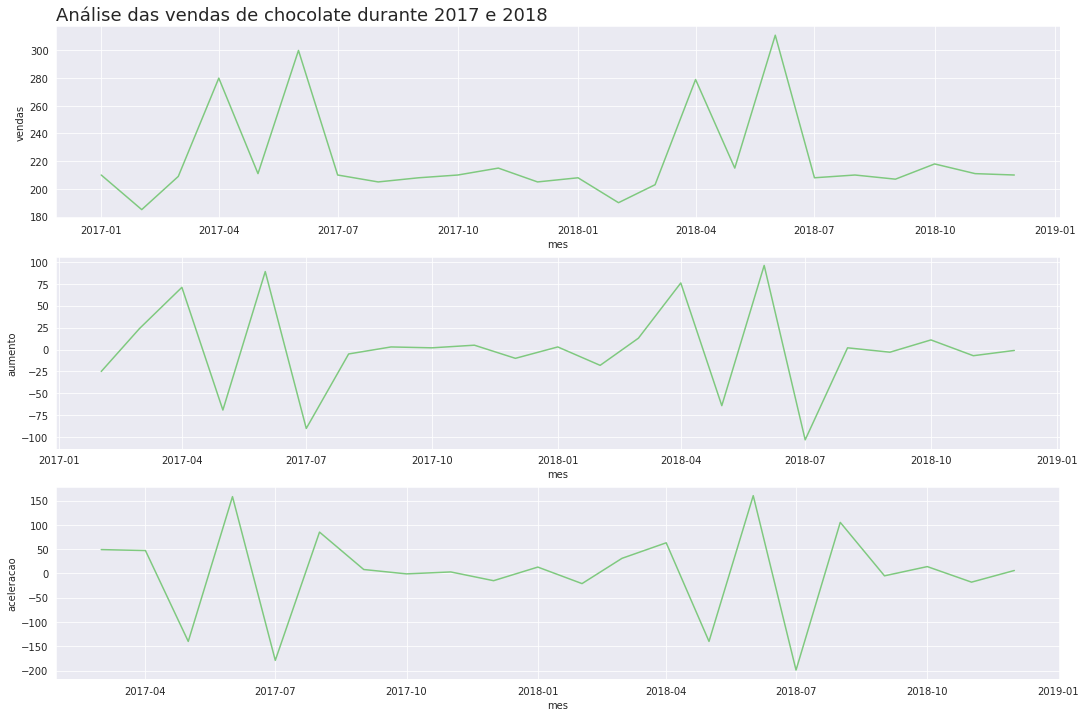

In [135]:
plota_varios_graficos(chocolates, 'Análise das vendas de chocolate durante 2017 e 2018', 'mes', ['vendas', 'aumento', 'aceleracao'])

Logo no primeiro gráfico já podemos notar diferenças claras em relação aos outros conjuntos de dados que foram analisados. Do primeiro para o segundo período analisado temos uma queda, mas logo em seguida observamos um aumento nas vendas, seguido por outra queda e novamente um aumento. Após um intervalo em que as vendas "praticamente" se mantém, observamos o mesmo comportamento da curva se repetindo.

Se notarmos os meses do ano em que isso acontece, veremos que os pontos de máximos e mínimos se encontram nos mesmos meses. A esse comportamento das vendas ao longo do tempo damos o nome de **sazonalidade**, que é um padrão repetitivo dentro de um período fixo de tempo.

Esse comportamento de sazonalidade é tão "forte" que pode ser observado também nos gráficos de "aumento das vendas" e "aceleração do aumento das vendas".

## 3.3 Vendas diárias de chocolate ao longo de dois meses


### 3.3.1 Explorando os dados

Vamos analisar os dados relativos às vendas diárias de uma loja durante dois meses, repetindo todos os passos até o _plot_ dos gráficos de comparação das quantidades que variam no tempo:

In [136]:
vendas_por_dia = pd.read_csv('https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/datasets/alura_time_series/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [137]:
print(vendas_por_dia.shape)
vendas_por_dia.info()

(61, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [138]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia.dia)
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [139]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


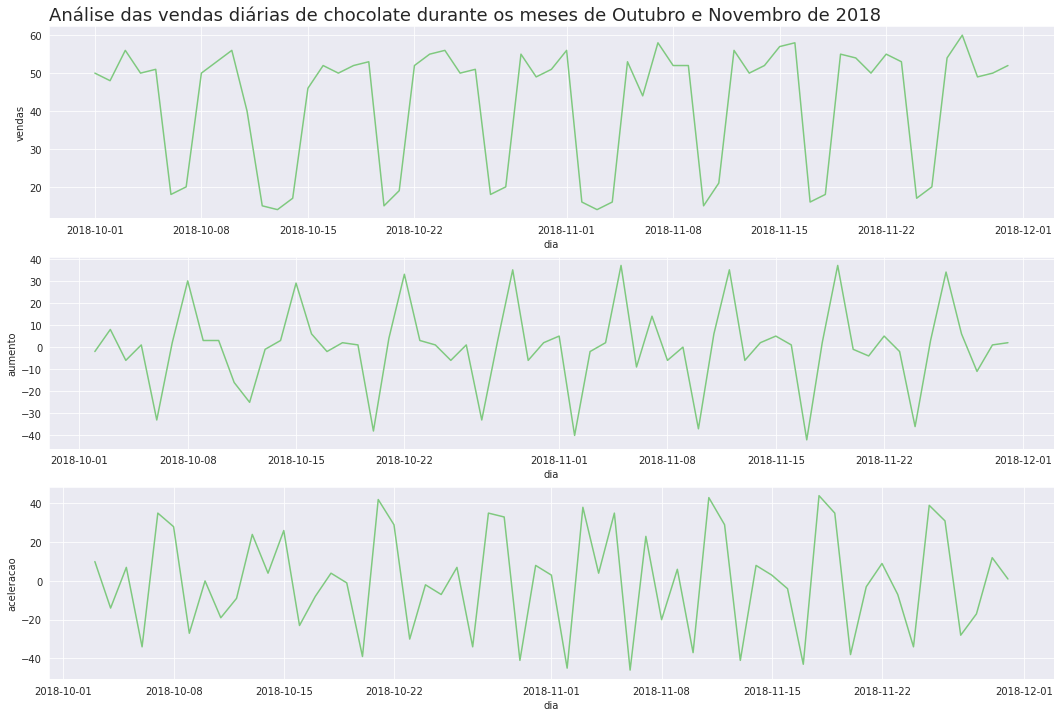

In [140]:
plota_varios_graficos(vendas_por_dia, 'Análise das vendas diárias de chocolate durante os meses de Outubro e Novembro de 2018', 'dia', ['vendas', 'aumento', 'aceleracao'])

Observando o gáfico de vendas podemos notar vários máximos e mínimos que vão evoluindo seguindo mais ou menos o mesmo padrão. Novamente temos um padrão sazonal para os dados, mas diferente do conjunto anterior, aqui o comportamento se repete muito mais vezes no intervalo de tempo analisado.

Essa sazonalidade também é refletida nos outros dois gráficos, de forma mais acentuada no de "aumento de vendas".

### 3.3.2 Analisando a sazonalidade de vendas diárias

Ao contrário do outro conjunto de dados em que tinhamos as vendas mensais e pudemos facilmente identificar o que estava causanda os picos de aumento de vendas, aqui estamos lidando com dados diários e temos uma frequência maior de do padrão sazonal.

Então vamos adicionar o dia da semana para tentar encontrar alguma coisa interessante:

In [141]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia.dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


Temos os dias da semana em inglês, então vamos passá-los para português:

In [142]:
vendas_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [143]:
dias_traduzidos = {
    'Monday': 'segunda',
    'Tuesday': 'terca',
    'Wednesday': 'quarta',
    'Thursday': 'quinta',
    'Friday': 'sexta',
    'Saturday': 'sabado',
    'Sunday': 'domingo'
}

In [144]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo


Vamos olhar os dados de duas semanas para ver se conseguimos identificar algum padrão interessante:

In [145]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terca
9,2018-10-10,56,3.0,0.0,quarta


A partir desse recorte podemos ver que os dias de sábado e domingo são os que apresentam menos vendas. E até mesmo uma sexta-feira em que tivemos um número baixo de vendas podemos verificar que se trata de um feriado.

Diante disso faz sentido pensar que as vendas são mais baixas nos fins de semana e feriados. De modo a evidenciar esse comportamento podemos agrupar o número de vendas pelo dia da semana:

In [146]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


Ao agrupar os dados de vendas fica claro que os fins de semana realmente são os períodos responsáveis pelas quedas nas vendas. 

# Aula 4 - Normalização e `statsmodels`

## 4.1 Autocorrelação das vendas diárias

Agora que já identificamos a sazonalidade das vendas diárias, vamos verificar a correlação de suas quantidades:

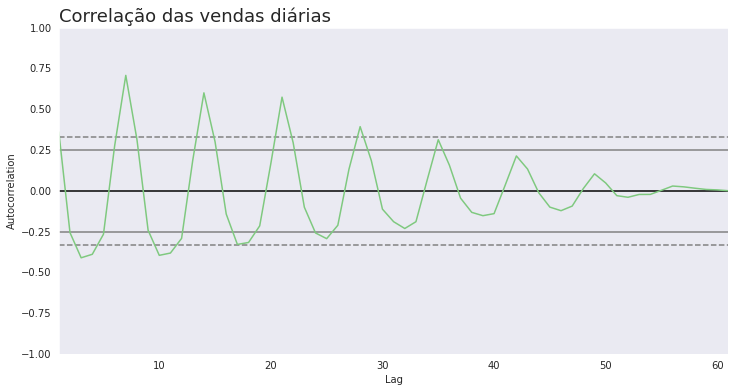

In [147]:
plota_correlacao(vendas_por_dia.vendas, 'Correlação das vendas diárias')

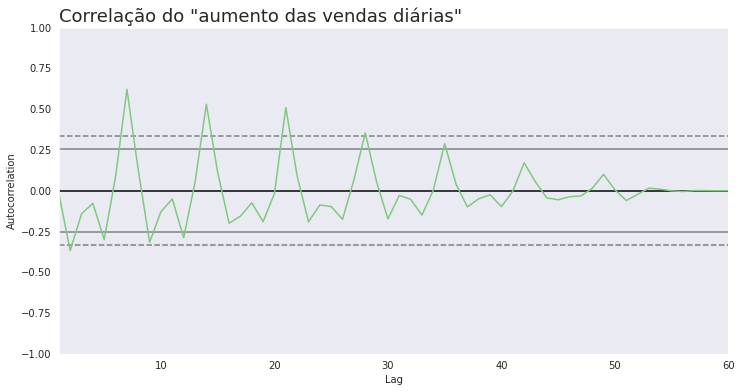

In [148]:
plota_correlacao(vendas_por_dia.aumento[1:], 'Correlação do "aumento das vendas diárias"')

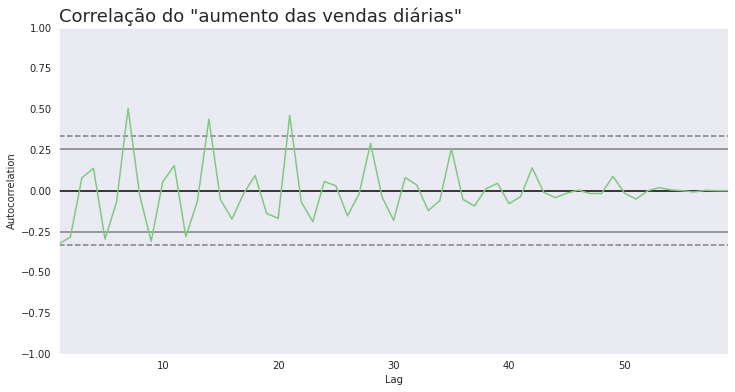

In [149]:
plota_correlacao(vendas_por_dia.aceleracao[2:], 'Correlação do "aumento das vendas diárias"')

Explicar como ler esses gráficos

## 4.2 Normalização

Vamos trocar mais uma vez de _dataset_, e agora iremos analisar os dados das vendas mensais de um café. Importamos os dados e aplicamos a transformação necessária para a coluna do tempo. Mas ao contrário das últimas análises, por hora vamos apenas plotar o gráfico de vendas x tempo:

In [150]:
cafe = pd.read_csv('https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/datasets/alura_time_series/cafelura.csv')
cafe.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [151]:
print(cafe.shape)
cafe.info()

(24, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [152]:
cafe['mes'] = pd.to_datetime(cafe.mes)
cafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

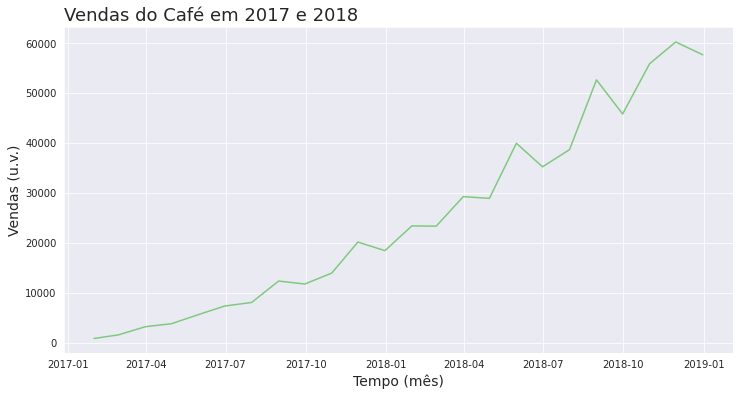

In [153]:
plota_grafico_linha(dataset=cafe, titulo='Vendas do Café em 2017 e 2018', legenda_x='Tempo (mês)', legenda_y='Vendas (u.v.)')

Nesse gráfico podemos observar uma clara tendência de crescimento, porém, ao longo da curva também podemos ver que existem alguns picos. Os dados são sobre vendas mensais e nem todos os meses são iguais, alguns possuem mais feriados que outros ou outras combinações de dias que possa provocar uma queda ou aumento nas vendas.

Para mitigar esses possíveis efeitos podemos aplicar uma normalização nos dados. Nessa situação específica, vamos normalizar a série temporal de acordo com os dias de fim de semana em cada mês. Para isso vamos utilizar um conjunto de dados com o número de dias de final de semana em cada um dos meses que estamos analisando:

In [154]:
dias_fds = pd.read_csv('https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/datasets/alura_time_series/dias_final_de_semana.csv')
dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


Após importar os dados, adicionamos essa informação no df `cafe`, também criamos a coluna com o valor das vendas normalizadas e plotamos um novo gráfico, mas agora com as vendas normalizadas ao longo do tempo:

In [155]:
cafe['dias_fds'] = dias_fds.quantidade_de_dias
cafe.head()

,mes,vendas,dias_fds
0,2017-01-31,880,8
1,2017-02-28,1600,8
2,2017-03-31,3240,10
3,2017-04-30,3840,8
4,2017-05-31,5670,9


In [156]:
# cafe['vendas_norm'] = cafe.vendas / dias_fds.quantidade_de_dias.values
cafe['vendas_norm'] = cafe.vendas / cafe.dias_fds
cafe.head()

,mes,vendas,dias_fds,vendas_norm
0,2017-01-31,880,8,110.0
1,2017-02-28,1600,8,200.0
2,2017-03-31,3240,10,324.0
3,2017-04-30,3840,8,480.0
4,2017-05-31,5670,9,630.0


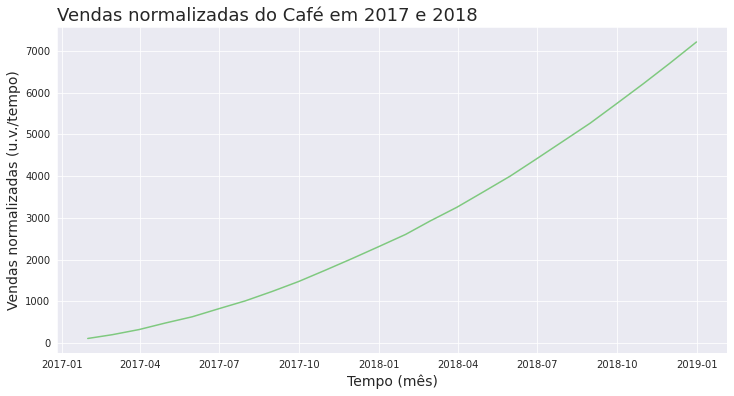

In [157]:
plota_grafico_linha(dataset=cafe, y='vendas_norm', titulo='Vendas normalizadas do Café em 2017 e 2018', legenda_x='Tempo (mês)', legenda_y='Vendas normalizadas (u.v./tempo)')

Vamos plotar esses dois gráficos juntos:

In [158]:
def plota_comparacao_normalizacao(dataset, titulo, x, y_abs, y_norm):
    plt.figure(figsize=(18, 12))
    ax = plt.subplot(2, 1, 1)
    sns.lineplot(x=x, y=y_abs, data=dataset)
    plt.subplot(2, 1, 2)
    sns.lineplot(x=x, y=y_norm, data=dataset)
    ax.set_title(titulo, fontsize=18, loc='left')
    ax=ax

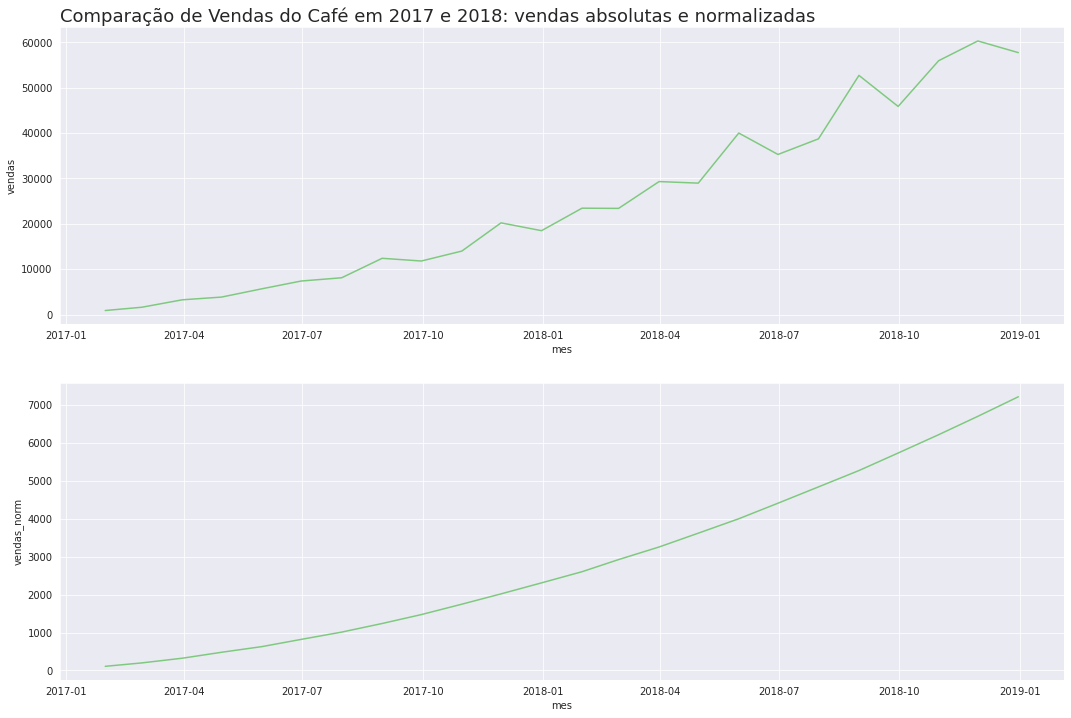

In [159]:
plota_comparacao_normalizacao(dataset=cafe, titulo='Comparação de Vendas do Café em 2017 e 2018: vendas absolutas e normalizadas', x='mes', y_abs='vendas', y_norm='vendas_norm')

### 4.2.1 Decomposição

Por curiosidade vamos fazer a decomposição dessas duas quantidades: vendas_absolutas e normalizadas.

In [160]:
cafe['aumento_abs'] = cafe.vendas.diff()
cafe['aceleracao_abs'] = cafe.aumento_abs.diff()
cafe['aumento_norm'] = cafe.vendas_norm.diff()
cafe['aceleracao_norm'] = cafe.aumento_norm.diff()
cafe.head()

,mes,vendas,dias_fds,vendas_norm,aumento_abs,aceleracao_abs,aumento_norm,aceleracao_norm
0,2017-01-31,880,8,110.0,NaN,NaN,NaN,NaN
1,2017-02-28,1600,8,200.0,720.0,NaN,90.0,NaN
2,2017-03-31,3240,10,324.0,1640.0,920.0,124.0,34.0
3,2017-04-30,3840,8,480.0,600.0,-1040.0,156.0,32.0
4,2017-05-31,5670,9,630.0,1830.0,1230.0,150.0,-6.0


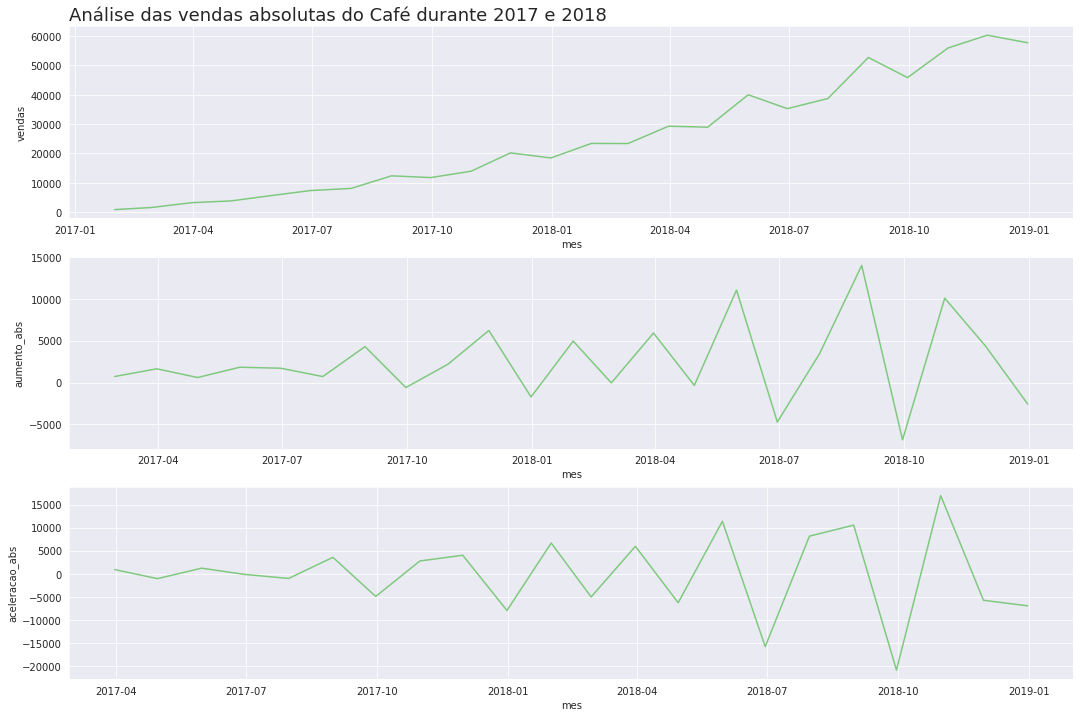

In [161]:
plota_varios_graficos(cafe, 'Análise das vendas absolutas do Café durante 2017 e 2018', 'mes', ['vendas', 'aumento_abs', 'aceleracao_abs'])

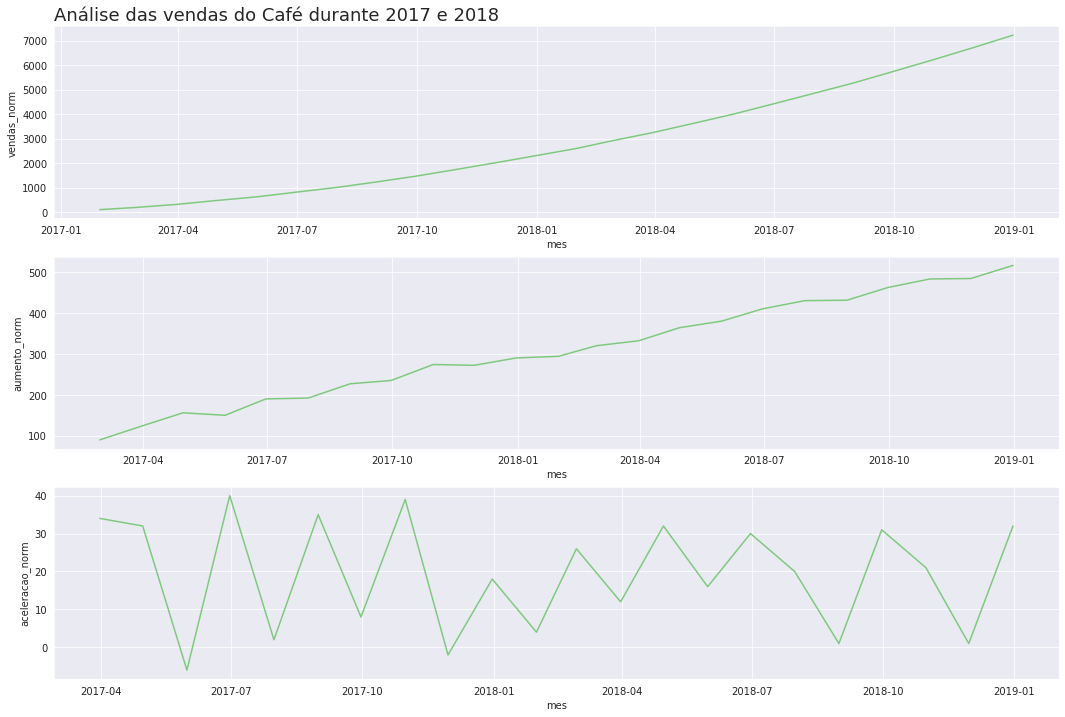

In [162]:
plota_varios_graficos(cafe, 'Análise das vendas do Café durante 2017 e 2018', 'mes', ['vendas_norm', 'aumento_norm', 'aceleracao_norm'])

## 4.3 `statsmodels`

Vamos recapitular alguns conceitos importantes no que diz respeito a séries temporais: **tendência** e **sazonalidade**.

A tendência nos indica como os dados estão/vão evoluindo ao longo do tempo. No caso da loja de carros temos uma tendência de crescimento ao longo de todo período analisado. Ou seja, os números de vendas vai sempre aumentando. Já quando olhamos para os dados da _newsletter_ observamos duas tendências diferentes, de crescimento nos primeiros 3/4 (mais ou menos) do intervalo analisado e estagnação no restante do intervalo.

A sazonalidade se refere a um padrão que se repete em intervalos fixos. No caso das vendas mensais de chocolate vemos que as épocas de Páscoa e Dia dos Namorados são melhores períodos para as vendas. E quando olhamos para as vendas diárias percebemos que os dias de fim de semana e feriado representam quedas nas vendas.

### 4.3.1 `seasonal_decompose`

Agora vamos conhecer uma nova função que irá auxiliar nossas análises de séries temporais: a [`seasonal_decompose`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) no pacote `seasonal` da biblioteca `statsmodel`, que de forma "mágica" nos fornece tendência(s), sazonalidade e ruídos da série temporal.

Para utilizar essa função vamos passar dois parâmetros: a série de dados observados `x`, que deve ter no mínimo dois ciclos completos e nesse caso serão as vendas mensais de chocolate; e `freq` (explicar esse), começando com `1` e aumentando.

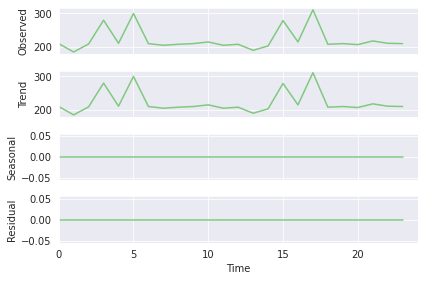

In [163]:
# freq=1
# resultado = seasonal_decompose(chocolates['vendas'], freq=1) # grafico nao começa em zero
resultado = seasonal_decompose([chocolates['vendas']], freq=1)
ax = resultado.plot()

Com frequencia igual a `1` recebemos o de tendência igual ao de observação, e os gráficos de sazonalidade e ruídos também retornam iguais, consntantes em zero.

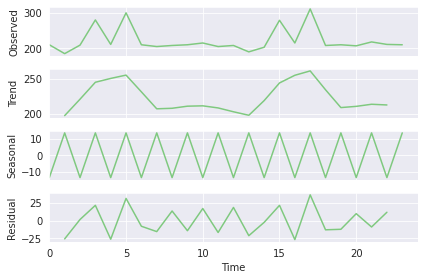

In [164]:
# freq=2
resultado = seasonal_decompose([chocolates['vendas']], freq=2)
ax = resultado.plot()

Definindo o valor da frequencia como `2` temos uma mudança nos gráficos. A tendência muda um pouco, agora o ponto de mínimo entre os picos é "eliminado". Os gráficos de sazonalidade e ruídos não são mais constantes em zero, mas ainda compartilham certa similaridade.

Note que o gráfico de ruído já não apresenta o primeiro ponto, isso significa que começamos a perder refrência (?) conforme o "nível de frequencia" escolhido (explicar melhor).

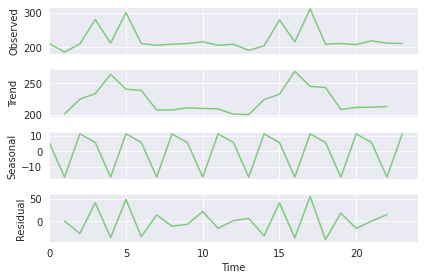

In [165]:
# freq=3
resultado = seasonal_decompose([chocolates['vendas']], freq=3)
ax = resultado.plot()

Para frequencia igual a `3` temos um comportamento similar ao valor anterior, mas com um pouco mais de granularidade nas curvas.

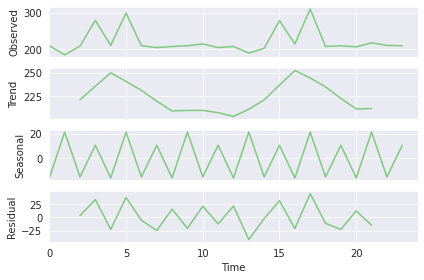

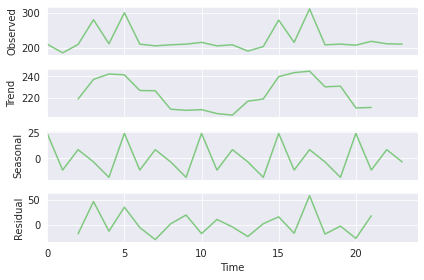

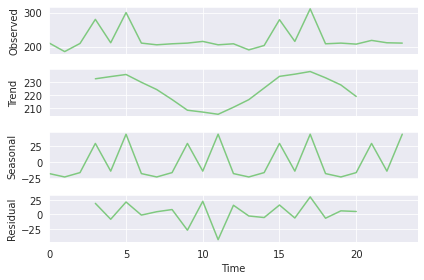

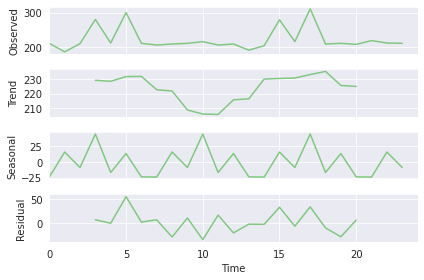

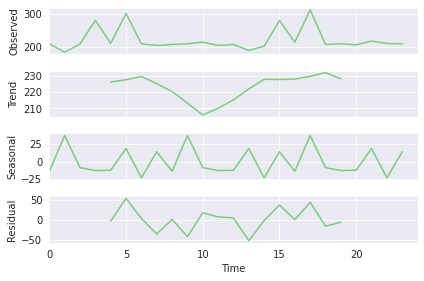

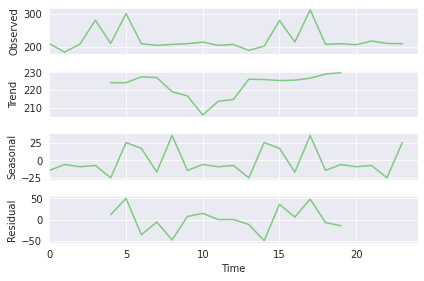

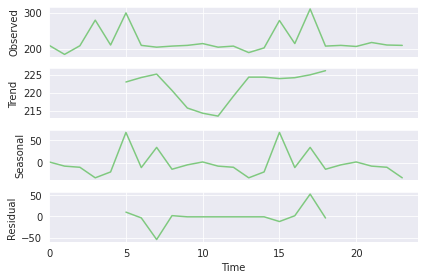

In [166]:
# freq=10
for i in range(4, 11):
    resultado = seasonal_decompose([chocolates['vendas']], freq=i)
    ax = resultado.plot()

Conforme aumentamos o valor da frequencia até `10` fica mais evidente a perda de referência nas análises de tendência e ruídos, o que deixa esses gráficos um pouco distorcidos. Mas em compesanção, cada vez mais enxergamos uma sazonalidade mais próxima dos dados observados.

Por eliminação dos menos melhores, vamos seguir com `freq=3` (na real to só seguindo o que o instrutor fez), montando um df com essas quantidades afim de plotar um gráfico maior para compará-las:

In [167]:
def decompoe_resultado(serie_observada, freq):
    resultado = seasonal_decompose(serie_observada, freq=freq)
    
    return pd.DataFrame({
        'observacao': resultado.observed,
        'tendencia': resultado.trend,
        'sazonalidade': resultado.seasonal,
        'ruido': resultado.resid,
    })

resultado = decompoe_resultado([chocolates['vendas']], 3)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


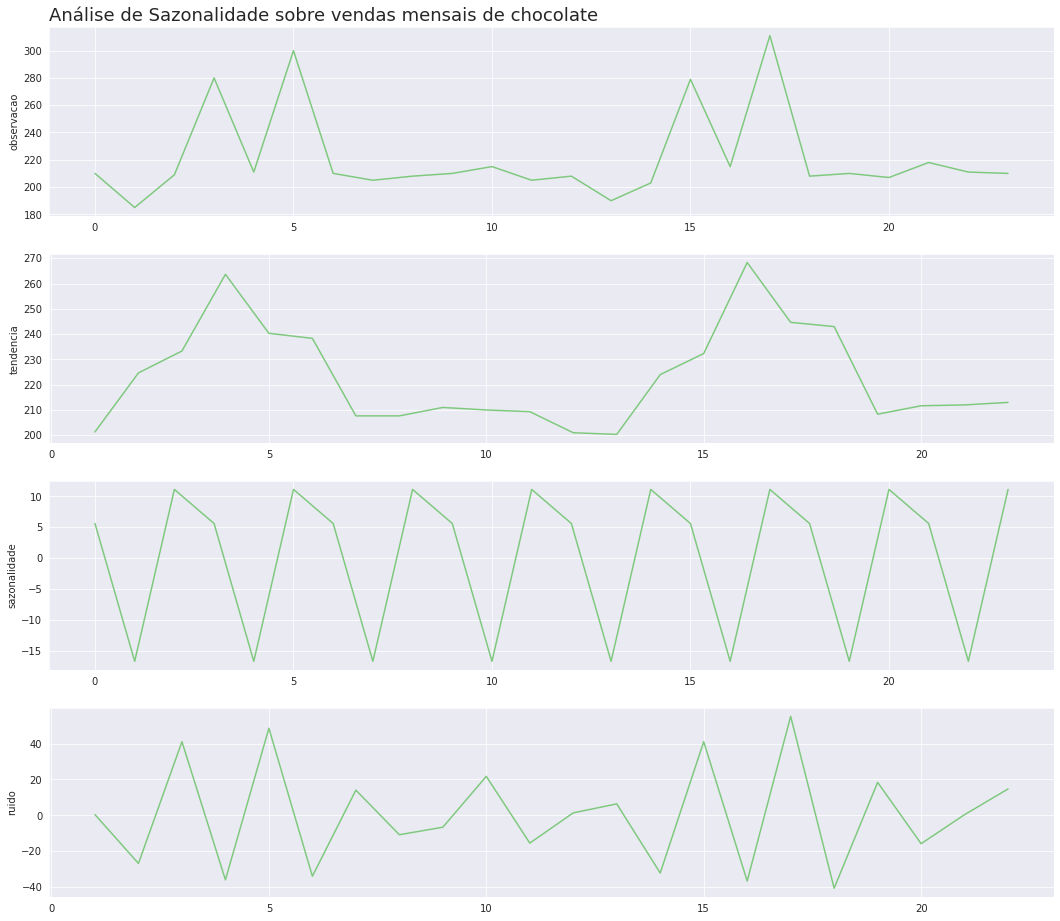

In [168]:
plota_varios_graficos(resultado, 'Análise de Sazonalidade sobre vendas mensais de chocolate', resultado.index, ['observacao', 'tendencia', 'sazonalidade', 'ruido'])

### 4.3.2 Outros _datasets_

A título de curiosidade vamos utilizar a funçãozinha mágica com outros _datasets_ explorados nesse _notebook_:

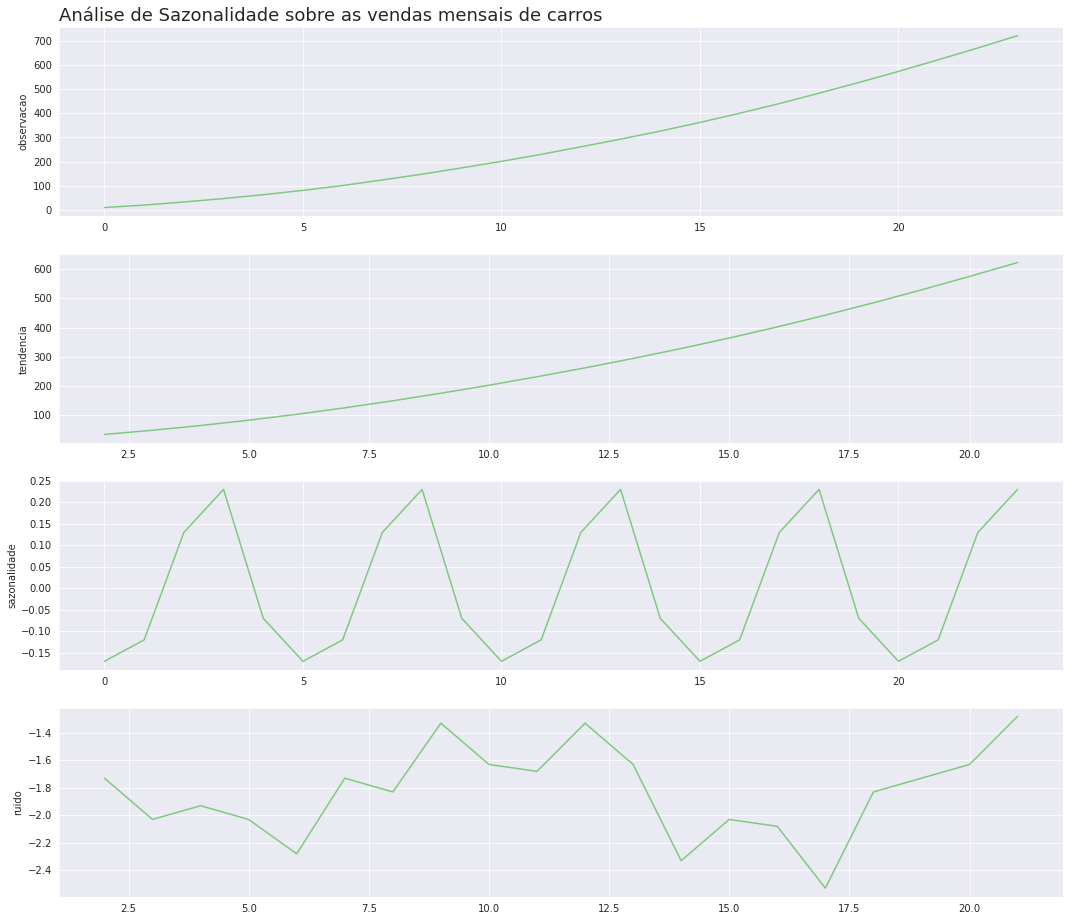

In [169]:
resultado_carros = decompoe_resultado([carros['vendas']], 5)
plota_varios_graficos(resultado_carros, 'Análise de Sazonalidade sobre as vendas mensais de carros', resultado_carros.index, ['observacao', 'tendencia', 'sazonalidade', 'ruido'])

(explicar isso)

# Aula 5 - Ruídos e média móvel

## 5.1 Ruídos

Vamos analisar agora os dados das vendas diárias de uma loja de celulares ao longo de dois meses. Iniciamos fazendo todos mesmos os passos iniciais para investigar o comportamento dos dados observados.

In [170]:
celulares = pd.read_csv('https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/datasets/alura_time_series/alucel.csv')
celulares.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [171]:
print(celulares.shape)
celulares.info()

(61, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     61 non-null     object 
 1   vendas  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [172]:
celulares['dia'] = pd.to_datetime(celulares.dia)
celulares.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [173]:
celulares['aumento'] = celulares.vendas.diff()
celulares['aceleracao'] = celulares.aumento.diff()
celulares.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


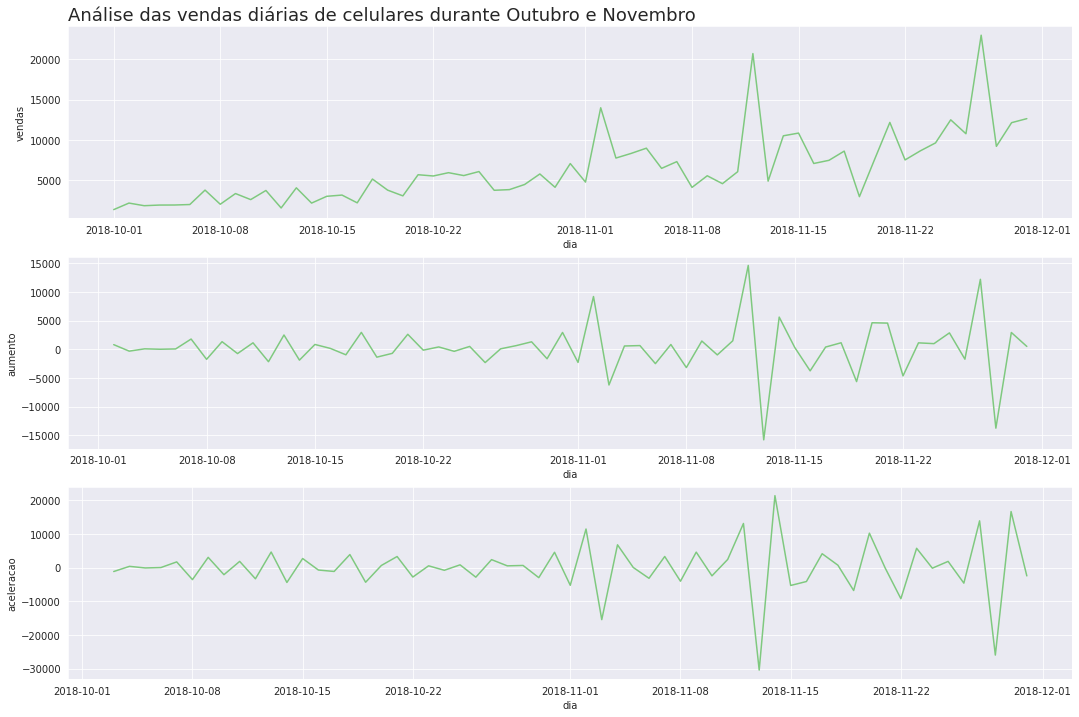

In [174]:
plota_varios_graficos(celulares, 'Análise das vendas diárias de celulares durante Outubro e Novembro', 'dia', ['vendas', 'aumento', 'aceleracao'])

A partir dos gráficos podemos ver que existe muito **ruído** para as três grandezas ao longo do tempo. O ruído é definido como "variações aleatórias dentro de uma série temporal".

Vamos dar uma olhada nas quantidades determinadas pela funçãozinha mágica do `statsmodels`, usando frequencia igual a 3:

In [175]:
resultado_cel = decompoe_resultado([celulares['vendas']], 3)
resultado_cel.head()

,observacao,tendencia,sazonalidade,ruido
0,1374.83,NaN,1383.705190,NaN
1,2185.69,1806.960000,-1210.178512,1588.908512
2,1860.36,1995.023333,-173.526678,38.863345
3,1939.02,1915.183333,1383.705190,-1359.868523
4,1946.17,1963.693333,-1210.178512,1192.655178


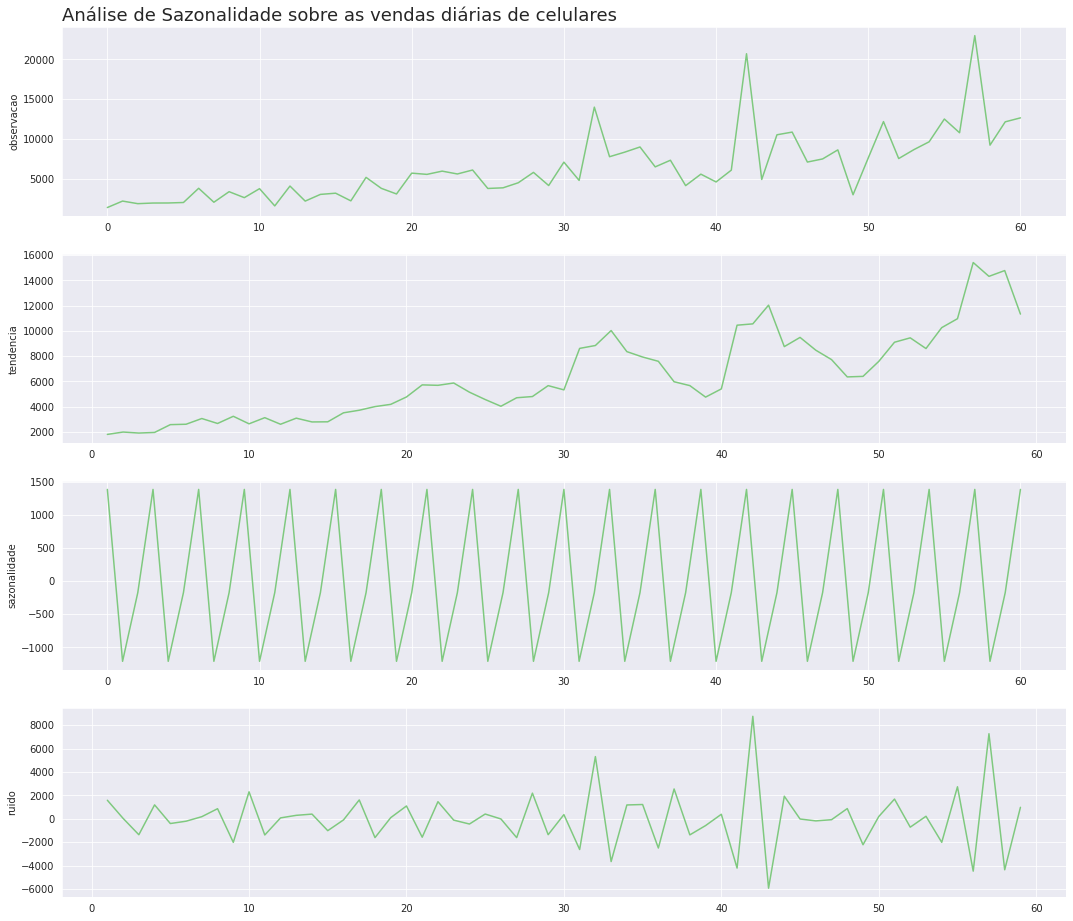

In [176]:
plota_varios_graficos(resultado_cel, 'Análise de Sazonalidade sobre as vendas diárias de celulares', resultado_cel.index, ['observacao', 'tendencia', 'sazonalidade', 'ruido'])

(comentar isso???)

## 5.2 Média móvel

Para mitigar esse ruído devemos normalizar os dados de alguma forma, e no caso essa forma será através da **média móvel**.

A média móvel funciona fazendo a média dos últimos N pontos. Então por exemplo, se defino meu `N=2` o primeiro dia não terá um valor para essa grandeza, no segundo dia teremos a média dos dois primeiros e no terceiro será a média do segundo e terceiro dias.

Vamos calcular a média móvel usando a função `rolling()` do Pandas que permite realizar algum calculo sobre uma janela de valores do df. No caso quero calcular a média em uma janela com tamanho 7 (dias):

In [177]:
celulares['media_movel_7_dias'] = celulares.vendas.rolling(7).mean()
celulares.head(7)

,dia,vendas,aumento,aceleracao,media_movel_7_dias
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


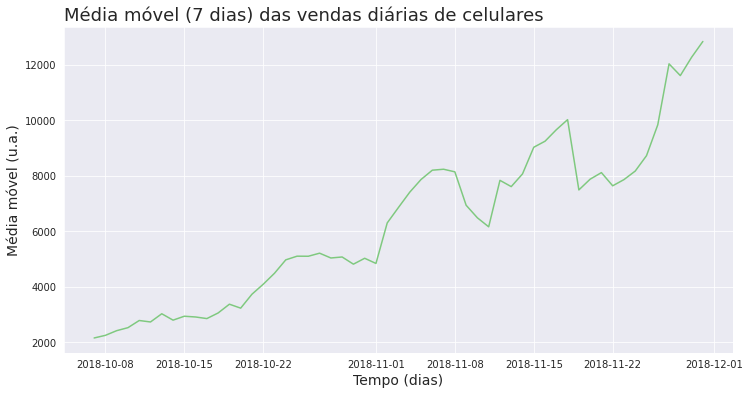

In [178]:
plota_grafico_linha(celulares, 'Média móvel (7 dias) das vendas diárias de celulares', 'Tempo (dias)', 'Média móvel (u.a.)', 'dia', 'media_movel_7_dias')

Note como a curva do gráfico fica muito mais suave, quando comparada com as vendas absolutas do dia. Se aumentar-mos a janela para 21 dias veremos que a curva suaviza ainda mais, porém, devemos nos atentar para o limite a partir do qual passamos a perder informação sobre as vendas. Vamos plotar os gráficos das vendas absolutas e das médias móveis juntas:

In [179]:
celulares['media_movel_21_dias'] = celulares.vendas.rolling(21).mean()

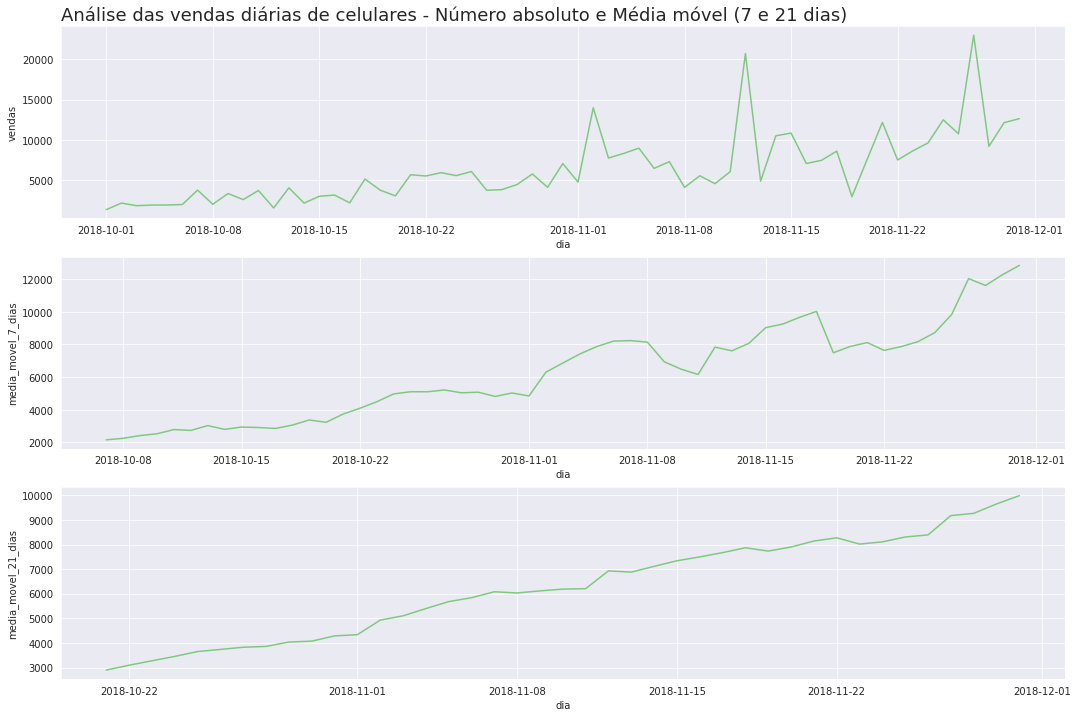

In [180]:
plota_varios_graficos(celulares, 'Análise das vendas diárias de celulares - Número absoluto e Média móvel (7 e 21 dias)', 'dia', ['vendas', 'media_movel_7_dias', 'media_movel_21_dias'])